# Delphes Samples

## Import modules

In [74]:
from dataset import H5Dataset
from helpers import plot_mass, find_indices, find_sample_number

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load samples

Have both lephad decays and hadhad decays available 

In [78]:
#dname = "dataMG"
dname = "/bundle/data/ATLAS/gwilliam/ProjectSamples/h5/Delphes"
#lhsamples = sorted(glob(f"{dname}/LepHad/*lephad.h5"))
hhsamples = sorted(glob(f"{dname}/HadHad/*hadhad.h5"))
data = H5Dataset(hhsamples, target_name = "Mtautau") 

Loading 4491 entries dataMG/HadHad/delphes.mg.htautau_100.auto.hadhad.h5
Loading 4704 entries dataMG/HadHad/delphes.mg.htautau_105.auto.hadhad.h5
Loading 5012 entries dataMG/HadHad/delphes.mg.htautau_110.auto.hadhad.h5
Loading 5249 entries dataMG/HadHad/delphes.mg.htautau_115.auto.hadhad.h5
Loading 5560 entries dataMG/HadHad/delphes.mg.htautau_120.auto.hadhad.h5
Loading 5767 entries dataMG/HadHad/delphes.mg.htautau_125.auto.hadhad.h5
Loading 5990 entries dataMG/HadHad/delphes.mg.htautau_130.auto.hadhad.h5
Loading 6249 entries dataMG/HadHad/delphes.mg.htautau_135.auto.hadhad.h5
Loading 6544 entries dataMG/HadHad/delphes.mg.htautau_140.auto.hadhad.h5
Loading 6591 entries dataMG/HadHad/delphes.mg.htautau_145.auto.hadhad.h5
Loading 6987 entries dataMG/HadHad/delphes.mg.htautau_150.auto.hadhad.h5
Loading 6882 entries dataMG/HadHad/delphes.mg.htautau_155.auto.hadhad.h5
Loading 7175 entries dataMG/HadHad/delphes.mg.htautau_160.auto.hadhad.h5
Loading 7199 entries dataMG/HadHad/delphes.mg.htaut

### Explore dataset

List of input feature names

In [63]:
print(data.feature_names)

['Tau1_Pt', 'Tau1_Eta', 'Tau1_Phi', 'Tau1_M', 'Tau2_Pt', 'Tau2_Eta', 'Tau2_Phi', 'Tau2_M', 'MET_Met', 'MET_Phi', 'NJets']


Input data

In [64]:
X = data.X()
print(X.shape)
X

(330574, 11)


array([[27.40760994, -0.46399826, -1.7500056 , ..., 21.03854561,
         1.19176507,  0.        ],
       [51.59762955,  1.27761722,  1.54441559, ..., 13.72839737,
        -1.67171037,  0.        ],
       [34.85570526,  2.22651839,  0.5594095 , ..., 12.84907913,
        -0.28366882,  0.        ],
       ...,
       [42.30640411,  2.02894187,  1.97818065, ..., 25.22886276,
        -1.62461674,  1.        ],
       [70.55197906, -1.06713891, -1.49111426, ..., 62.59972   ,
        -1.25214267,  2.        ],
       [38.98775101,  2.02844954,  1.65658164, ..., 43.91345215,
        -0.56344974,  3.        ]])

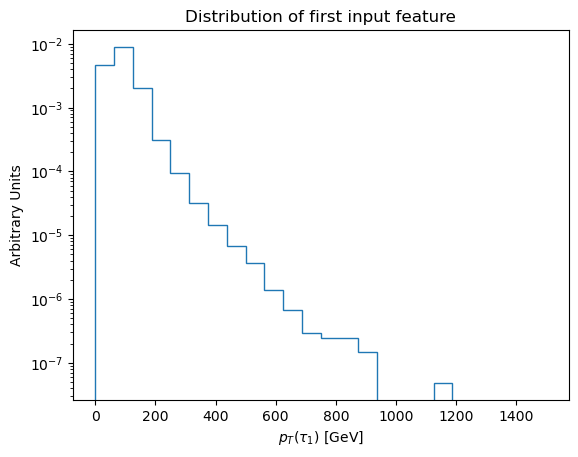

In [71]:
itau1pt = data.feature_names.index("Tau1_Pt")

plt.figure()
plt.title("Distribution of first input feature")
plt.xlabel(r"$p_T (\tau_1)$ [GeV]")
plt.ylabel("Arbitrary Units")
plt.hist(X[:, itau1pt], bins = np.linspace(0, 1500, 25), fill = None, 
         histtype = "step", density = True)
plt.yscale('log')
plt.show()

Output target mass for all samples

In [66]:
y = data.y()
print (y.shape)
y

(330574, 1)


array([[100.00000059],
       [100.        ],
       [ 99.99834136],
       ...,
       [ 94.99999589],
       [ 87.71581993],
       [ 94.85431804]])

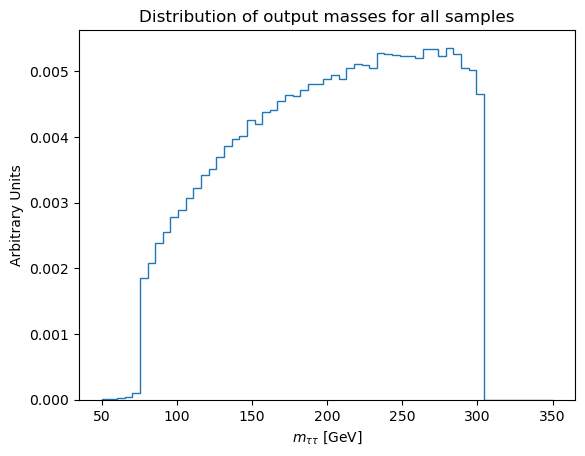

In [72]:
plt.figure()
plt.title("Distribution of output masses for all samples")
plt.xlabel(r"$m_{\tau\tau}$ [GeV]")
plt.ylabel("Arbitrary Units")
plt.hist(y, bins = np.linspace(50, 350, 60), fill = None, 
         histtype = "step", density = True)
plt.show()

Auxilary data, including a label for the individual samples and the ATLAS MMC and CMS SVFIt to compare to 

In [68]:
print(data.aux_labels())
isvf = data.aux_labels().index("MSVFit")
immc = data.aux_labels().index("MMMC")
aux = data.aux()
aux

['MSVFit', 'sample', 'MMMC']


array([[ 96.47263336,   0.        ,  86.18063245],
       [ 89.93239594,   0.        ,  97.64092276],
       [ 93.40338135,   0.        ,  94.77956581],
       ...,
       [ 90.57057953,  44.        ,  86.23851945],
       [ 94.04777145,  44.        ,  92.90210467],
       [110.5509758 ,  44.        , 101.79145571]])

Plot the ATLAS and CMS masses versus the truth for one mass sample

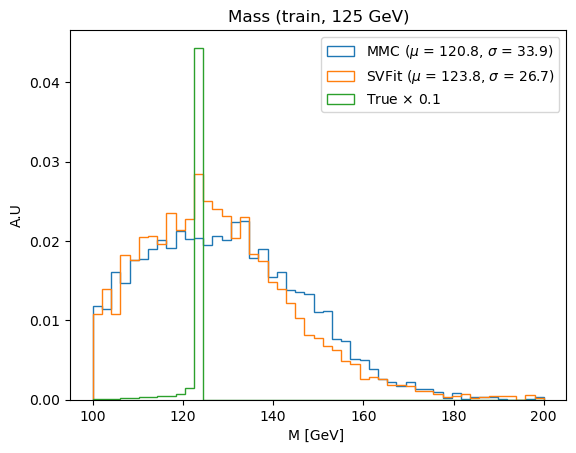

In [69]:
i125 = find_indices(hhsamples, aux, data.aux_labels(), "125")

plot_mass(None, aux[i125, immc], aux[i125, isvf], mtrue=y[i125], 
          title = "Mass (train, 125 GeV)", bins=np.linspace(100, 200, 50), true_scale = 0.1)

### Get individual data events
Data for first event

In [70]:
X0, y0 = data[0]
print(X0)
print(y0)

tensor([27.4076, -0.4640, -1.7500,  1.7770, 25.0870, -1.9027,  1.2791,  1.7770,
        21.0385,  1.1918,  0.0000])
tensor([100.])
